In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense

2024-12-10 23:09:51.676710: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733864991.759039   18272 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733864991.781162   18272 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-10 23:09:51.966364: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# 1. Повнозв'язані нейронні мережі
Вирішіть завдання класифікації даних, з якими ви працювали в лабораторній № 1 за допомогою повнозв’язаної нейромережі прямого поширення (fully connected feed-forward network). Результати порівняйте з одержаними раніше. 
Приклади:
https://github.com/natsakh/Data-Analysis/tree/main/Pr_5
https://keras.io/examples/structured_data/imbalanced_classification/

First, vectorize the CSV data

In [2]:
fname = '../Lab_1/letter+recognition/letter-recognition.data'
target = "lettr"

df = pd.read_csv(fname)

for i in range(len(df)):
    df.loc[i, "lettr"] = ord(df.loc[i, "lettr"]) - 65

num_classes = 26


features = np.array(df.drop([target], axis=1), dtype="float32")
targets = np.array(df[target], dtype="uint8")
print("features.shape:", features.shape)
print("targets.shape:", targets.shape)

features.shape: (20000, 16)
targets.shape: (20000,)


Prepare a validation set

In [3]:
x_train, x_temp, y_train, y_temp = train_test_split(features, targets, test_size=0.4, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

print("Number of training samples:", len(x_train))
print("Number of validation samples:", len(x_val))

Number of training samples: 12000
Number of validation samples: 4000


Text(0.5, 1.0, 'Problem')

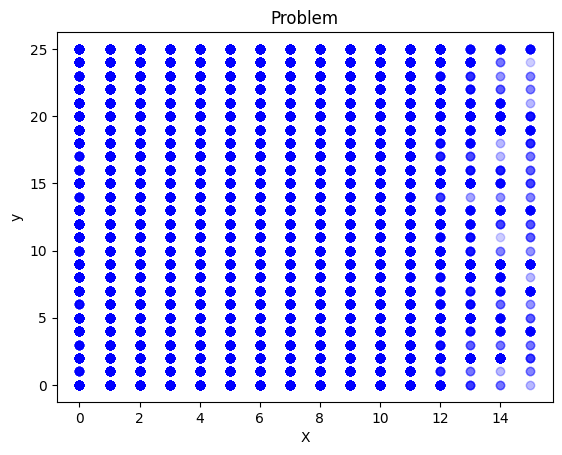

In [4]:
plt.plot(x_train, y_train, 'bo', alpha = 0.1)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Problem')

Analyze class imbalance in the targets

In [5]:
counts = np.bincount(y_train)
print(
    "Number of positive samples in training data: {} ({:.2f}% of total)".format(
        counts[1], 100 * float(counts[1]) / len(y_train)
    )
)

weight_for_0 = 1.0 / counts[0]
weight_for_1 = 1.0 / counts[1]

Number of positive samples in training data: 461 (3.84% of total)


Normalize the data using training set statistics

In [6]:
mean = np.mean(x_train, axis=0)
x_train -= mean
x_val -= mean
x_test -= mean
std = np.std(x_train, axis=0)
x_train /= std
x_val /= std
x_test /= std

Build a binary classification model

In [7]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [8]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(256, activation="relu"),
    layers.BatchNormalization(),
    layers.Dense(256, activation="relu"),
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(128, activation="relu"),
    layers.Dense(26, activation="softmax")
])


# /model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train,
                    y_train,
                    epochs=30,
                    batch_size=256,
                    validation_split=0.2,
                    verbose = 2)

Epoch 1/30


2024-12-10 23:09:57.644695: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


38/38 - 2s - 64ms/step - accuracy: 0.6422 - loss: 1.3003 - val_accuracy: 0.5775 - val_loss: 2.4069
Epoch 2/30
38/38 - 0s - 10ms/step - accuracy: 0.8348 - loss: 0.5426 - val_accuracy: 0.8183 - val_loss: 1.9362
Epoch 3/30
38/38 - 0s - 9ms/step - accuracy: 0.8869 - loss: 0.3598 - val_accuracy: 0.8267 - val_loss: 1.5313
Epoch 4/30
38/38 - 0s - 10ms/step - accuracy: 0.9195 - loss: 0.2648 - val_accuracy: 0.8438 - val_loss: 1.1632
Epoch 5/30
38/38 - 0s - 10ms/step - accuracy: 0.9286 - loss: 0.2239 - val_accuracy: 0.8963 - val_loss: 0.8375
Epoch 6/30
38/38 - 0s - 9ms/step - accuracy: 0.9433 - loss: 0.1760 - val_accuracy: 0.8971 - val_loss: 0.6070
Epoch 7/30
38/38 - 0s - 10ms/step - accuracy: 0.9546 - loss: 0.1396 - val_accuracy: 0.9021 - val_loss: 0.4478
Epoch 8/30
38/38 - 0s - 10ms/step - accuracy: 0.9619 - loss: 0.1199 - val_accuracy: 0.9388 - val_loss: 0.2776
Epoch 9/30
38/38 - 0s - 9ms/step - accuracy: 0.9652 - loss: 0.1076 - val_accuracy: 0.9108 - val_loss: 0.3181
Epoch 10/30
38/38 - 0s -

In [9]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

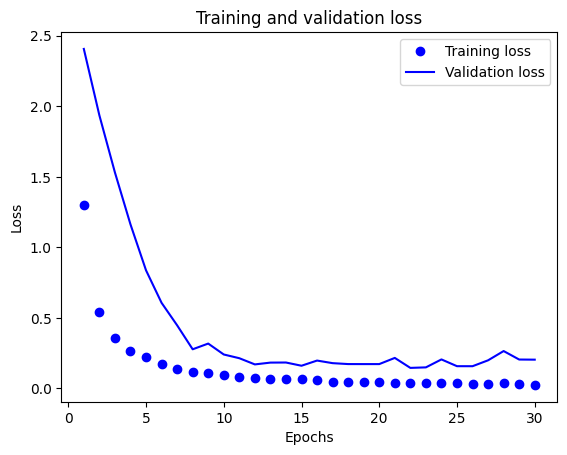

In [10]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [11]:
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

 44/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9528 - loss: 0.2466

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9478 - loss: 0.2570
Test loss: 0.2603851556777954
Test accuracy: 0.9455000162124634
